In [656]:
import scipy.linalg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
from matplotlib import cm

In [657]:
#пример

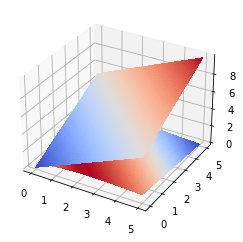

In [658]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 5, 0.00125)
Y = np.arange(0, 5, 0.00125)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X + Y)
Z = np.sin(R)
T = np.square(R)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [659]:
n = 10
m = 2000

In [660]:
grid = np.zeros((m+1,n+1))
for i in range(n + 1):
    grid[0][i] = (i/n)*(1 - i/n)*(1 - i/n)
t = 1/m
h = 1/n

In [661]:
for i in range(n + 1):
    grid[0][i] = (i/n)*(1 - i/n)*(1 - i/n)

In [662]:
t = 1/m

In [663]:
h = 1/n

In [664]:
def get_coefficients(nu, q, u, mu):
    d = [None]*(nu - 1)
    d[0] = u[mu][1] + q*u[mu][2]/2 - q*u[mu][1]+q*u[mu][0]/2 + q*u[mu][0]/2
    for i in range(1, n - 2):
        d[i] = u[mu][i+1] + 0.5*q*(u[mu][i + 2] - 2*u[mu][i+1] + u[mu][i])
    d[nu-2] = u[mu][nu - 1] + 0.5*q*(u[mu][nu] - 2*u[mu][n - 1] + u[mu][n - 2]) + u[mu][nu]*q/2
    a = [-q/2 for i in range(nu - 1)]
    a[0] = 0
    b = [1 + q for i in range(nu - 1)]
    c = [-q/2 for i in range(nu-1)]
    c[nu-2] = 0
    return a,b,c,d

In [665]:
def tdma(a, b, c, d):
    n = len(b)
    x = np.zeros(n)  
    for k in range(1,n):
        q = a[k]/b[k-1]
        b[k] = b[k] - c[k-1]*q
        d[k] = d[k] - d[k-1]*q   
    q = d[n-1]/b[n-1]
    x[n-1] = q  
    for k in range(n-2,-1,-1):
        q = (d[k]-c[k]*q)/b[k]
        x[k] = q
    return x

In [666]:
for l in range(1, m + 1):
    a,b,c,d = get_coefficients(n, t/(h*h), grid, l - 1)
    x = tdma(a, b, c, d)
    for k in range(1, len(x) + 1):
        grid[l][k] = x[k - 1]

In [667]:
grid

array([[0.00000000e+00, 8.10000000e-02, 1.28000000e-01, ...,
        3.20000000e-02, 9.00000000e-03, 0.00000000e+00],
       [0.00000000e+00, 7.93476461e-02, 1.26601135e-01, ...,
        3.23994325e-02, 9.67617696e-03, 0.00000000e+00],
       [0.00000000e+00, 7.77861496e-02, 1.25206599e-01, ...,
        3.27967004e-02, 1.03069252e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.25756722e-06, 4.29414804e-06, ...,
        4.29414804e-06, 2.25756722e-06, 0.00000000e+00],
       [0.00000000e+00, 2.24654488e-06, 4.27318229e-06, ...,
        4.27318229e-06, 2.24654488e-06, 0.00000000e+00],
       [0.00000000e+00, 2.23557634e-06, 4.25231890e-06, ...,
        4.25231890e-06, 2.23557634e-06, 0.00000000e+00]])

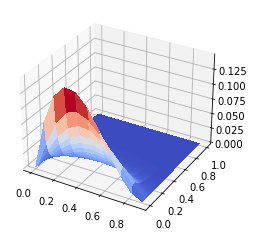

In [668]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 1/(n+1))
Y = np.arange(0, 1, 1/(m+1))
X, Y = np.meshgrid(X, Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, grid, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [669]:
import pyvista as pv
from pyvista import examples

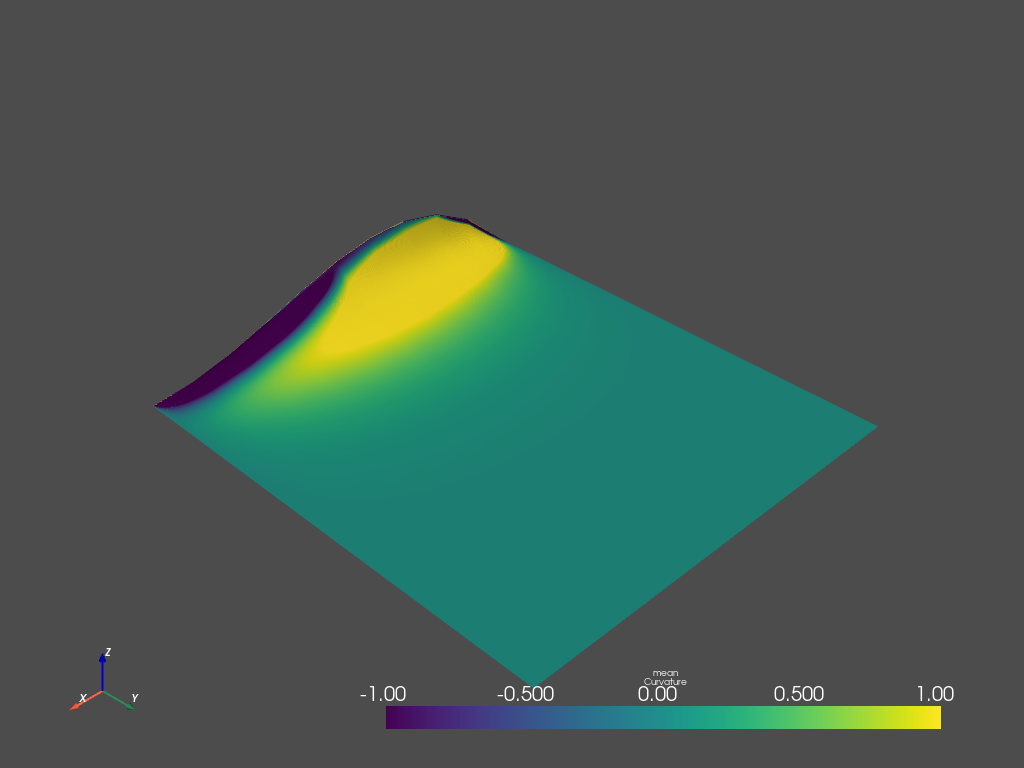

[(1.9703848205099375, 2.015589490902014, 1.5893393659644826),
 (0.4545454545454546, 0.49975012493753124, 0.0735),
 (0.0, 0.0, 1.0)]

In [670]:
gr = pv.StructuredGrid(X,Y , grid)
gr.plot_curvature(clim=[-1, 1])

In [671]:
from mpl_toolkits.mplot3d import Axes3D 

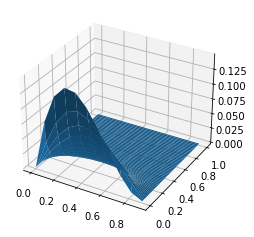

In [672]:
x = np.arange(0, 1, 1/(n+1))
y = np.arange(0, 1, 1/(m+1))
# meshgrid makes a retangular grid out of two 1-D arrays. 
x, y = np.meshgrid(x, y)

# surface plot for x^2 + y^2 
fig = plt.figure() # creates space for a figure to be drawn 

# Uses a 3d prjection as model is supposed to be 3D
axes = fig.gca(projection ='3d')

# Plots the three dimensional data consisting of x, y and z 
axes.plot_surface(x, y, grid) 

# show command is used to visualize data plot   
plt.show() 


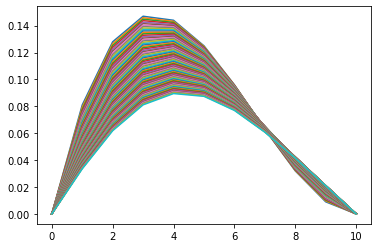

In [673]:
for i in range(80):
    plt.plot(grid[i])

In [730]:
def analytical_solution(x,t):
    val = 0
    sum = 0
    n = 1
    while((n < 1000)):
        sum += 2*(4 + 2*cos(pi*n))/(pi*pi*pi*n*n*n)*sin(pi*n*x)*exp(-pi*pi*n*n*t)
        n += 1
    return sum

In [682]:
analyt_grid = np.zeros((m+1,n+1))

In [683]:
for t in range(m + 1):
    for x in range(n + 1):
        analyt_grid[t][x] = analytical_solution(x/n, t/m)

In [684]:
analyt_grid

array([[0.00000000e+00, 8.09999992e-02, 1.28000000e-01, ...,
        3.20000002e-02, 9.00000039e-03, 1.59774951e-20],
       [0.00000000e+00, 7.93004374e-02, 1.26600000e-01, ...,
        3.24000000e-02, 9.69978131e-03, 1.95979069e-18],
       [0.00000000e+00, 7.76225363e-02, 1.25200003e-01, ...,
        3.27999987e-02, 1.03887318e-02, 2.62178185e-18],
       ...,
       [0.00000000e+00, 2.08240080e-06, 3.96096170e-06, ...,
        3.96096170e-06, 2.08240080e-06, 8.25263827e-22],
       [0.00000000e+00, 2.07214988e-06, 3.94146329e-06, ...,
        3.94146329e-06, 2.07214988e-06, 8.21201346e-22],
       [0.00000000e+00, 2.06194942e-06, 3.92206086e-06, ...,
        3.92206086e-06, 2.06194942e-06, 8.17158862e-22]])

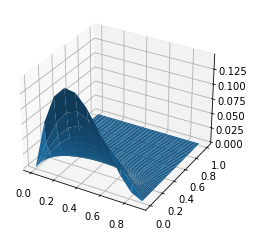

In [685]:
x = np.arange(0, 1, 1/(n+1))
y = np.arange(0, 1, 1/(m+1))
# meshgrid makes a retangular grid out of two 1-D arrays. 
x, y = np.meshgrid(x, y)

# surface plot for x^2 + y^2 
fig = plt.figure() # creates space for a figure to be drawn 

# Uses a 3d prjection as model is supposed to be 3D
axes = fig.gca(projection ='3d')

# Plots the three dimensional data consisting of x, y and z 
axes.plot_surface(x, y, analyt_grid) 

# show command is used to visualize data plot   
plt.show() 

In [686]:
t1 = np.max(analyt_grid - grid)

In [687]:
t1

0.00039397840139306084

In [688]:
n = 20
m = 2000

In [689]:
grid = np.zeros((m+1,n+1))
for i in range(n + 1):
    grid[0][i] = (i/n)*(1 - i/n)*(1 - i/n)
t = 1/m
h = 1/n

In [690]:
for l in range(1, m + 1):
    a,b,c,d = get_coefficients(n, t/(h*h), grid, l - 1)
    x = tdma(a, b, c, d)
    for k in range(1, len(x) + 1):
        grid[l][k] = x[k - 1]

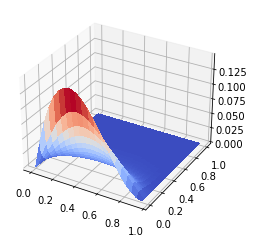

In [691]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 1/(n+1))
Y = np.arange(0, 1, 1/(m+1))
X, Y = np.meshgrid(X, Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, grid, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [692]:
analyt_grid = np.zeros((m+1,n+1))
for t in range(m + 1):
    for x in range(n + 1):
        analyt_grid[t][x] = analytical_solution(x/(n), t/(m))

In [693]:
ang = np.transpose(grid)

In [694]:
t = [np.max(grid[i]) for i in range(grid.shape[0])]

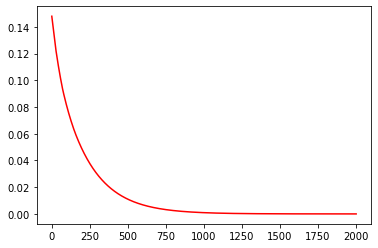

In [695]:
plt.plot((t), color = 'red')

In [696]:
t2 = np.max(analyt_grid - grid)

In [697]:
t1/t2

3.9579582932814565

In [698]:
n = 40
m = 2000

In [699]:
grid = np.zeros((m+1,n+1))
for i in range(n + 1):
    grid[0][i] = (i/n)*(1 - i/n)*(1 - i/n)
t = 1/m
h = 1/n

In [700]:
for l in range(1, m + 1):
    a,b,c,d = get_coefficients(n, t/(h*h), grid, l - 1)
    x = tdma(a, b, c, d)
    for k in range(1, len(x) + 1):
        grid[l][k] = x[k - 1]

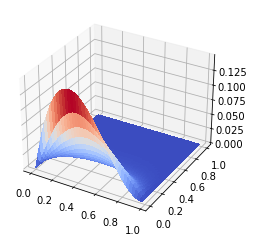

In [701]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 1/(n+1))
Y = np.arange(0, 1, 1/(m+1))
X, Y = np.meshgrid(X, Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, grid, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [702]:
analyt_grid = np.zeros((m+1,n+1))
for t in range(m + 1):
    for x in range(n + 1):
        analyt_grid[t][x] = analytical_solution(x/(n), t/(m))

In [703]:
t3 = np.max(analyt_grid - grid)

In [704]:
t2/t3

4.052043641275022

In [705]:
n = 80
m = 2000

In [706]:
grid = np.zeros((m+1,n+1))
for i in range(n + 1):
    grid[0][i] = (i/n)*(1 - i/n)*(1 - i/n)
t = 1/m
h = 1/n

In [707]:
for l in range(1, m + 1):
    a,b,c,d = get_coefficients(n, t/(h*h), grid, l - 1)
    x = tdma(a, b, c, d)
    for k in range(1, len(x) + 1):
        grid[l][k] = x[k - 1]

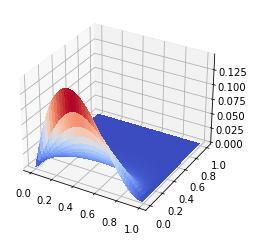

In [708]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 1/(n+1))
Y = np.arange(0, 1, 1/(m+1))
X, Y = np.meshgrid(X, Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, grid, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [709]:
analyt_grid = np.zeros((m+1,n+1))
for t in range(m + 1):
    for x in range(n + 1):
        analyt_grid[t][x] = analytical_solution(x/(n), t/(m))

In [710]:
t4 = np.max(analyt_grid - grid)

In [711]:
t4/t3

3.8068746333098393

In [745]:
n = 1000
m = 10

In [746]:
grid1 = np.zeros((m+1,n+1))
for i in range(n + 1):
    grid1[0][i] = (i/n)*(1 - i/n)*(1 - i/n)
t = 1/m
h = 1/n

In [747]:
for l in range(1, m + 1):
    a,b,c,d = get_coefficients(n, t/(h*h), grid1, l - 1)
    x = tdma(a, b, c, d)
    for k in range(1, len(x) + 1):
        grid1[l][k] = x[k - 1]

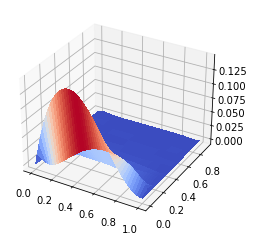

In [748]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 1/(n+1))
Y = np.arange(0, 1, 1/(m+1))
X, Y = np.meshgrid(X, Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, grid1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [749]:
analyt_grid1 = np.zeros((m+1,n+1))
for t in range(m + 1):
    for x in range(n + 1):
        analyt_grid1[t][x] = analytical_solution(x/(n), t/(m))

In [750]:
analyt_grid1.shape

(11, 1001)

In [751]:
t5 = np.max(analyt_grid1 - grid1)

In [752]:
n = 2000
m = 20

In [753]:
grid2 = np.zeros((m+1,n+1))
for i in range(n + 1):
    grid2[0][i] = (i/n)*(1 - i/n)*(1 - i/n)
t = 1/m
h = 1/n

In [754]:
for l in range(1, m + 1):
    a,b,c,d = get_coefficients(n, t/(h*h), grid2, l - 1)
    x = tdma(a, b, c, d)
    for k in range(1, len(x) + 1):
        grid2[l][k] = x[k - 1]

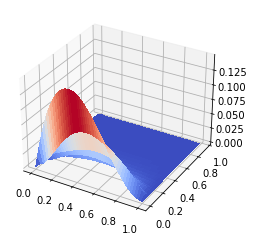

In [755]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 1/(n+1))
Y = np.arange(0, 1, 1/(m+1))
X, Y = np.meshgrid(X, Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, grid2, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [756]:
analyt_grid2 = np.zeros((m+1,n+1))
for t in range(m + 1):
    for x in range(n + 1):
        analyt_grid2[t][x] = analytical_solution(x/(n), t/(m))

In [757]:
t6 = np.max(analyt_grid2 - grid2)

In [758]:
t5/t6

2.0262285572388503

In [ ]:
n = 1000
m = 40

In [ ]:
grid3 = np.zeros((m+1,n+1))
for i in range(n + 1):
    grid3[0][i] = (i/n)*(1 - i/n)*(1 - i/n)
t = 1/m
h = 1/n

In [ ]:
for l in range(1, m + 1):
    a,b,c,d = get_coefficients(n, t/(h*h), grid3, l - 1)
    x = tdma(a, b, c, d)
    for k in range(1, len(x) + 1):
        grid3[l][k] = x[k - 1]

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 1/(n+1))
Y = np.arange(0, 1, 1/(m+1))
X, Y = np.meshgrid(X, Y)
# Plot the surface.
surf = ax.plot_surface(X, Y, grid3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [ ]:
analyt_grid3 = np.zeros((m+1,n+1))
for t in range(m + 1):
    for x in range(n + 1):
        analyt_grid3[t][x] = analytical_solution(x/(n), t/(m))

In [ ]:
t7 = np.max(analyt_grid3 - grid3)

In [ ]:
t6/t7

In [ ]:
n = 2000
m = 80